### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

In [59]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

eco_data = pd.read_csv('./data/ecommerce_sales_data.csv')
display(eco_data)

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [60]:
find_top_5 = eco_data.head()
#print(find_top_5) # 상위 5개 출력
#print(eco_data.count()) # 독일 초콜릿에서 discountRate에 1건의 누락 발견

food_discount_mean = eco_data[eco_data['Category'] == 'Food']['DiscountRate'].mean()
eco_data['DiscountRate'] = eco_data['DiscountRate'].mask(eco_data['DiscountRate'].isnull(), food_discount_mean)
eco_data.isnull().sum() # 음식의 discountRate의 평균으로 대체
print(eco_data[(eco_data["Country"] == "독일") & (eco_data["Product"] == "초콜릿")])

dtypes_before = eco_data.dtypes # 데이터 타입 확인
eco_data['OrderDate'] = pd.to_datetime(eco_data['OrderDate']) # 데이터 변경
dtypes_after = eco_data.dtypes # 데이터 변경확인
print(dtypes_before, dtypes_after)


    OrderID Product Category  Quantity  Price  CustomerID   Birthdate  \
52       53     초콜릿     Food         5  33000        1029  1990-01-03   

           OrderDate Country  DiscountRate  
52  2024-03-01 22:02      독일      0.174091  
OrderID           int64
Product          object
Category         object
Quantity          int64
Price             int64
CustomerID        int64
Birthdate        object
OrderDate        object
Country          object
DiscountRate    float64
dtype: object OrderID                  int64
Product                 object
Category                object
Quantity                 int64
Price                    int64
CustomerID               int64
Birthdate               object
OrderDate       datetime64[ns]
Country                 object
DiscountRate           float64
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

C:\Users\김준협\AppData\Local\Temp\ipykernel_29716\1523513531.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = eco_data['TotalRevenue'].resample('M').sum()


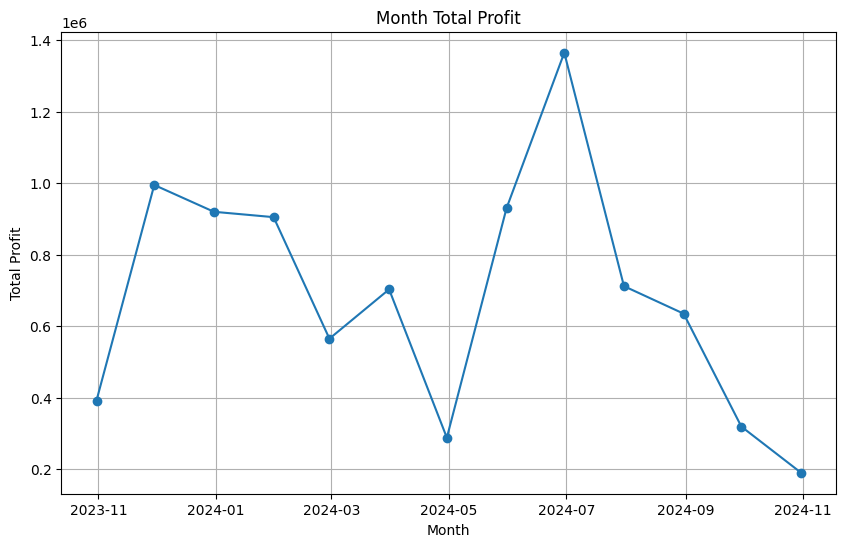

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64

In [61]:
eco_data['TotalRevenue'] = eco_data['Quantity'] * eco_data['Price']
eco_data[['Quantity', 'Price', 'TotalRevenue']].head() # 결과 확인

eco_data.set_index('OrderDate', inplace=True)
monthly_revenue = eco_data['TotalRevenue'].resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Month Total Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show() #월 별 데이터 집계

category_totalRevenue = eco_data.groupby('Category')['TotalRevenue'].sum()
top_3_category = category_totalRevenue.sort_values(ascending=False).head(3)
display(top_3_category)

country_revenue = eco_data.groupby('Country')['TotalRevenue'].sum()
top_5_country = country_revenue.sort_values(ascending=False).head(5)
display(top_5_country)

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [62]:
customer_revenue = eco_data.groupby('CustomerID')['TotalRevenue'].sum()
top_5_customer = customer_revenue.sort_values(ascending=False).head(5)
display(top_5_customer) # 매출액 top 5

customer_order_count = eco_data['CustomerID'].value_counts()
top_5_order_customer = customer_order_count.head(5)
display(top_5_order_customer) # 주문 횟수 top 5

eco_data['Birthdate'] = pd.to_datetime(eco_data['Birthdate'])
eco_data['Age'] = 2024 - eco_data['Birthdate'].dt.year # 2024 -생일 = 나이

def age_group(age): # 연령대 설정
    if age < 20:
        return '10대 이하'
    elif age < 30:
        return '20대'
    elif age < 40:
        return '30대'
    elif age < 50:
        return '40대'
    elif age < 60:
        return '50대'
    else:
        return '60대 이상'

eco_data['AgeGroup'] = eco_data['Age'].apply(age_group) # 나이 컬럼 추가
agegroup_top_category = eco_data.groupby('AgeGroup')['Category'].agg(lambda x: x.value_counts().idxmax())
display(agegroup_top_category)

display(eco_data["AgeGroup"].value_counts()) # 나이 별 인원수 확인

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

CustomerID
1206    2
1278    2
1496    2
1007    2
1673    2
Name: count, dtype: int64

AgeGroup
20대            Beauty
30대              Food
40대             Books
50대       Electronics
60대 이상         Sports
Name: Category, dtype: object

AgeGroup
30대       35
50대       30
40대       25
20대       25
60대 이상     5
Name: count, dtype: int64

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [63]:
product_sales = eco_data.groupby('Product')['Quantity'].sum() # 상품별 합계
top_5_products = product_sales.sort_values(ascending=False).head(5)
display(top_5_products)

category_top_product = eco_data.groupby(['Category', 'Product'])['Quantity'].sum().reset_index() # 'Category', 'Product'를 'Quantity'합계로 그룹화
category_top_product = category_top_product.sort_values(['Category', 'Quantity'], ascending=[True, False]).drop_duplicates('Category')
display(category_top_product)

product_avg_quantity = eco_data.groupby('Product')['Quantity'].mean()
top_3_avg_quantity_products = product_avg_quantity.sort_values(ascending=False).head(3)
display(top_3_avg_quantity_products)

Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

,Category,Product,Quantity
1,Beauty,립스틱,22
7,Books,소설,21
10,Clothing,셔츠,25
14,Electronics,노트북,15
23,Food,커피,20
25,Sports,요가매트,12


Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64

5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

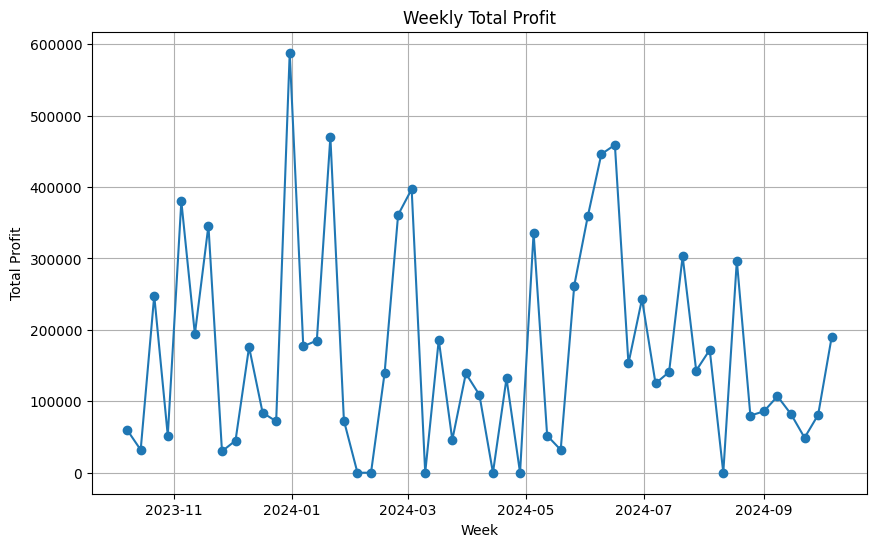

최소 날짜: 2023-10-08 05:49:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
최대 날짜: 2024-10-03 10:55:00


C:\Users\김준협\AppData\Local\Temp\ipykernel_29716\2093263618.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  period_monthly_revenue = period_filtered['TotalRevenue'].resample('M').sum()


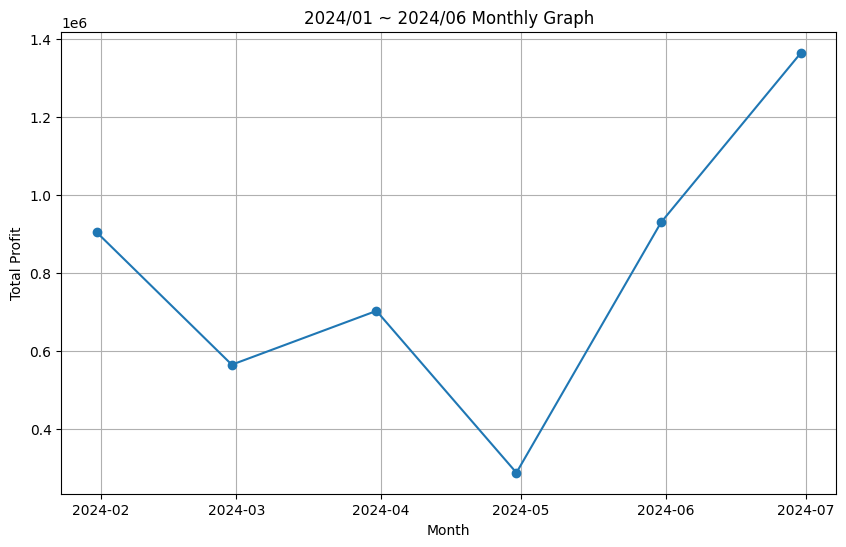

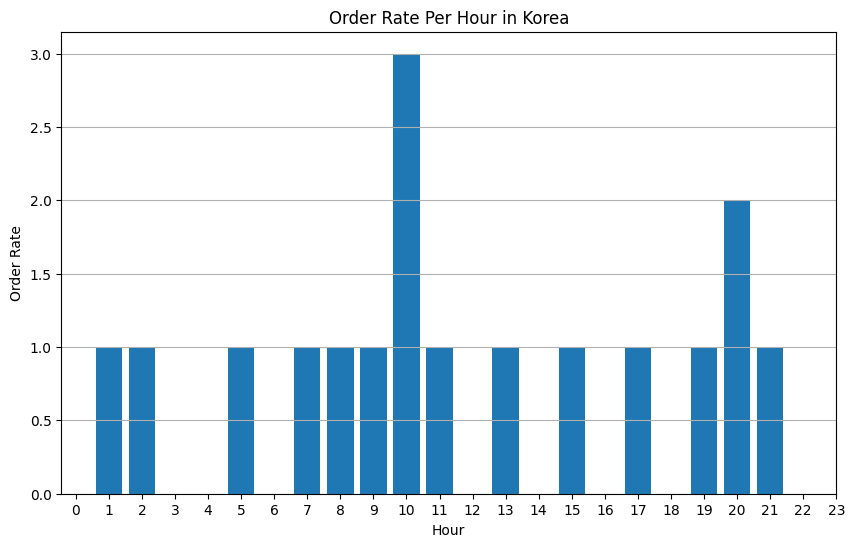

In [78]:
weekly_revenue = eco_data['TotalRevenue'].resample('W').sum()
#print(weekly_revenue)

plt.figure(figsize=(10, 6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o')
plt.title('Weekly Total Profit')
plt.xlabel('Week')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

print("최소 날짜:", eco_data.index.min()) # 날찌 데이터 확인
print(type(eco_data.index.min()))
print("최대 날짜:", eco_data.index.max())

period_filtered = eco_data[eco_data.index.to_series().between('2024-01-01', '2024-06-30')]
period_monthly_revenue = period_filtered['TotalRevenue'].resample('M').sum()
#display(period_monthly_revenue)

plt.figure(figsize=(10, 6))
plt.plot(period_monthly_revenue.index, period_monthly_revenue.values, marker='o')
plt.title('2024/01 ~ 2024/06 Monthly Graph')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

korea_data = eco_data[eco_data['Country'] == '대한민국'].copy()
korea_data['Hour'] = korea_data.index.hour
korea_hourly_orders = korea_data['Hour'].value_counts().sort_index()
#display(korea_hourly_orders)

plt.figure(figsize=(10,6))
plt.bar(korea_hourly_orders.index, korea_hourly_orders.values)
plt.title('Order Rate Per Hour in Korea')
plt.xlabel('Hour')
plt.ylabel('Order Rate')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [93]:
customer_order_counts = eco_data['CustomerID'].value_counts() # 고객별 주문 횟수 확인
#display(customer_order_counts)
repurchase_customers = customer_order_counts[customer_order_counts >= 2].count() # 2이상을 통해 재구매한 고객 수 확인
#display(repurchase_customers)
total_customers = customer_order_counts.count() # total 고객
#display(total_customers)
repurchase_rate = repurchase_customers / total_customers
print(repurchase_rate)

#display(eco_data)
eco_data['DiscountedRevenue'] = eco_data['TotalRevenue'] * (1 - eco_data['DiscountRate'])
category_discount = eco_data.groupby('Category')['DiscountRate'].mean()
display(category_discount.sort_values(ascending=False))


0.08108108108108109


Category
Beauty         0.186522
Sports         0.179444
Electronics    0.175789
Food           0.174091
Books          0.170000
Clothing       0.154000
Name: DiscountRate, dtype: float64